In [1]:
!pip install graphviz
# sudo apt-get install graphviz cmd

In [2]:
from film_user import Store, UserFactory
import os
from graphviz import Digraph, Graph

# Usuarios

In [3]:
!python3 film_user.py newuser "miriam <miriam@uni.pe>"

Traceback (most recent call last):
  File "film_user.py", line 463, in <module>
    main()
  File "film_user.py", line 334, in main
    raise Exception(
Exception: El nick miriam ya se encuentra registrado


<h3>Lista de usuarios</h3>

In [4]:
!python3 film_user.py listofusers

jbardalesr
jesus
miriam
felipeturing


<h3>Establecemos las amistades</h3>

In [5]:
!python3 film_user.py setfriends miriam felipeturing

Amistad establecida


<h3>Lista de amigos</h3>

In [6]:
!python3 film_user.py listoffriends

Jesus Torrejon es amig@ de Miriam
Walter Felipe es amig@ de Miriam
Walter Felipe es amig@ de Jordi Bardales
Miriam es amig@ de Jesus Torrejon
Jordi Bardales es amig@ de Walter Felipe
Miriam es amig@ de Walter Felipe


<h3>Lista de amigos en un grafo</h3>

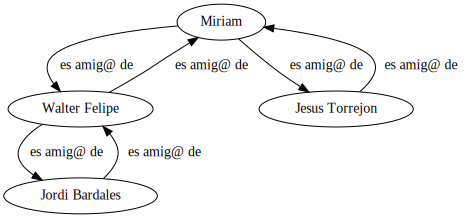

In [7]:
storefn = os.path.expanduser("~/movies.n3")
userfn = os.path.expanduser("~/users.n3")

storeuri = "file://" + storefn
useruri = "file://" + userfn

title_store = "Movie Theater"
title_user = "Fábrica de usuarios"

s = Store(storefn, storeuri, title_store)
u = UserFactory(userfn, useruri, title_user)

g = Digraph()

for data_friend in u.list_friends():
    g.edge(data_friend[0], data_friend[1], label="es amig@ de")
g

<h3>Amigos de</h3>

Amigos de felipeturing


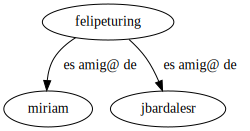

In [8]:
storefn = os.path.expanduser("~/movies.n3")
userfn = os.path.expanduser("~/users.n3")

storeuri = "file://" + storefn
useruri = "file://" + userfn

title_store = "Movie Theater"
title_user = "Fábrica de usuarios"

s = Store(storefn, storeuri, title_store)
u = UserFactory(userfn, useruri, title_user)

g = Digraph()

for data_friend in u.list_friends_of_nick("felipeturing"):
    g.edge("felipeturing", data_friend[0], label="es amig@ de")

print("Amigos de felipeturing")
g

# Películas

In [9]:
#https://www.imdb.com/title/tt1754656/
#https://www.imdb.com/title/tt0441773/
#https://www.imdb.com/title/tt0468569/

In [18]:
!python3 film_user.py newmovie https://www.imdb.com/title/tt0816692/

Película : b'Interstellar'
Año : 2014
Género :  Adventure Drama Sci-Fi 
Dirigida por: b'Christopher Nolan'
Actores principales:
b'Ellen Burstyn' como Murph
b'Matthew McConaughey' como Cooper


In [11]:
!python3 film_user.py listofmovies

https://www.imdb.com/title/tt1754656/ - The Little Prince
https://www.imdb.com/title/tt0468569/ - The Dark Knight
https://www.imdb.com/title/tt0120338/ - Titanic
https://www.imdb.com/title/tt0441773/ - Kung Fu Panda


In [19]:
!python3 film_user.py moviebydirector "Christopher Nolan"

Interstellar - 2014
Inception - 2010
The Dark Knight - 2008


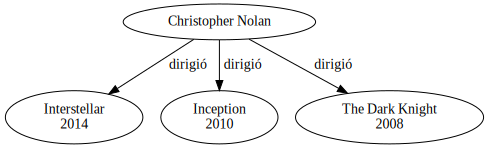

In [22]:
g = Digraph()
g.edge("Christopher Nolan", "Interstellar\n2014", label="dirigió")
g.edge("Christopher Nolan", "Inception\n2010", label="dirigió")
g.edge("Christopher Nolan", "The Dark Knight\n2008", label="dirigió")
g

In [20]:
for data_friend in s.movie_by_url("<https://www.imdb.com/title/tt0468569/>"):
    print(data_friend)

(rdflib.term.Literal('The Dark Knight'), rdflib.term.Literal('2008', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')), rdflib.term.Literal('Christopher Nolan'), rdflib.term.Literal('Heath Ledger'))
(rdflib.term.Literal('The Dark Knight'), rdflib.term.Literal('2008', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')), rdflib.term.Literal('Christopher Nolan'), rdflib.term.Literal('Christian Bale'))
